# Latent Fingerprints Clustering - Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import df
df_GBC = pd.read_csv('classGBC.csv')
df_GNB = pd.read_csv('classGNB.csv')
df_KNN = pd.read_csv('classKNN.csv')
df_LDA = pd.read_csv('classLDA.csv')
df_LR  = pd.read_csv('classLR.csv')
df_MLP = pd.read_csv('classMLP.csv')
df_RFC = pd.read_csv('classRFC.csv')
df_SVC = pd.read_csv('classSVC.csv')

data_frames = [df_GBC, df_GNB, df_KNN, df_LDA, df_LR, df_MLP, df_RFC, df_SVC]

clusters_size_two = pd.read_csv('clusters_size_two.csv', index_col=0)
clusters_size_three = pd.read_csv('clusters_size_three.csv', index_col=0)

In [3]:
concat_dataset = pd.concat(data_frames, axis = 0)

In [4]:
df_pivot = concat_dataset.pivot_table('auc' , index = 'file', columns = 'classifier').reset_index().rename_axis(None, axis = 1)
df_pivot.rename(columns = {'file':'Divisions'} , inplace = True)
df_pivot.set_index('Divisions', inplace = True)

In [5]:
df_cluster_3 = pd.merge(clusters_size_three, df_pivot, how='left', left_index=True, right_index=True)

In [6]:
df_cluster_2 = pd.merge(clusters_size_two, df_pivot, how='left', left_index=True, right_index=True)

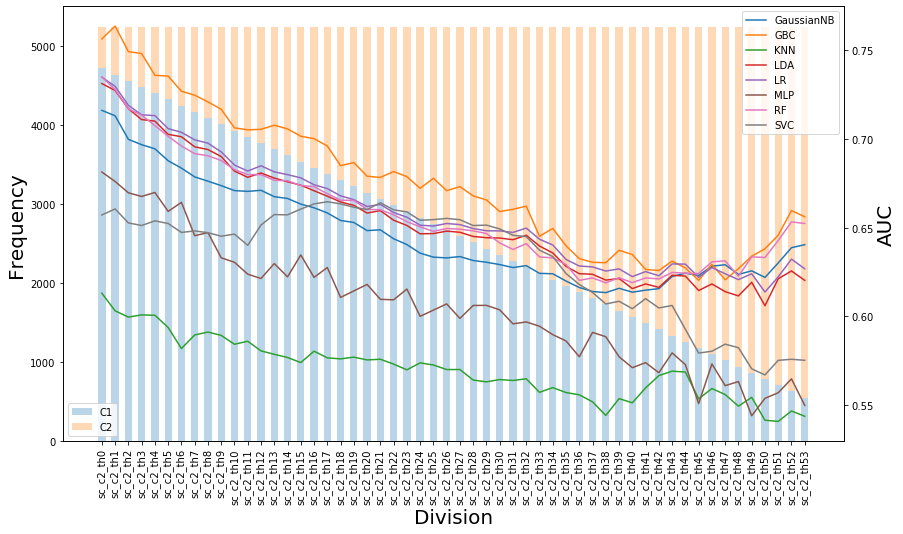

In [7]:
# Two axis with two clusters plot

labels = df_cluster_2.index
width = 0.55 # the width of the bars
values_C1 = df_cluster_2.C1
values_C2 = df_cluster_2.C2
list_names = ['GaussianNB','GBC','KNN','LDA','LR','MLP','RF','SVC']
model_values = df_cluster_2.iloc[:,2:]

fig, ax1 = plt.subplots(figsize = (14,8))

ax1.bar(labels, values_C1 , width , label = 'C1', alpha=0.3)
ax1.bar(labels, values_C2, width , bottom = values_C1, label = 'C2', alpha=0.3)
ax1.set_ylabel('Frequency', fontsize=20)
ax1.set_xlabel('Division', fontsize=20)
plt.xticks(rotation =90) # rotate the x axis 90 degrees

ax1.legend(loc=3) # instantiate the legend of axis 1

ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis

ax2.plot(labels, model_values, label=list_names)
ax2.set_ylabel('AUC', fontsize=20)

ax2.legend(list_names, loc=0) #instantiate the legend of axis 2

plt.show()

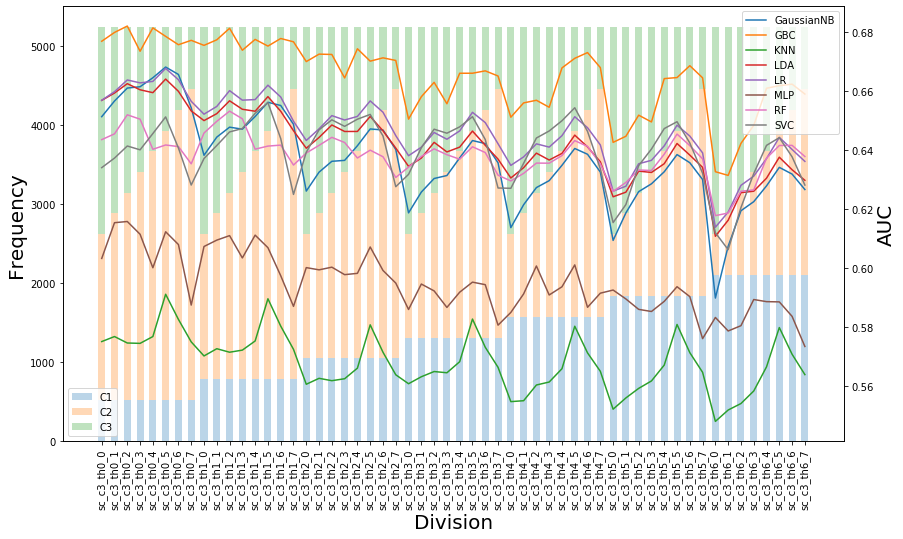

In [8]:
# Two axis with THREE clusters plot

labels = df_cluster_3.index
width = 0.55 # the width of the bars
values_C1 = df_cluster_3.C1
values_C2 = df_cluster_3.C2
values_C3 = df_cluster_3.C3
list_names = ['GaussianNB','GBC','KNN','LDA','LR','MLP','RF','SVC']
model_values = df_cluster_3.iloc[:,3:]

fig, ax1 = plt.subplots(figsize = (14,8))

ax1.bar(labels, values_C1, width , label = 'C1', alpha=0.3)
ax1.bar(labels, values_C2, width , bottom = values_C1, label = 'C2', alpha=0.3)
ax1.bar(labels, values_C3, width, bottom=values_C1+values_C2, label='C3', alpha=0.3)

ax1.set_ylabel('Frequency', fontsize=20)
ax1.set_xlabel('Division', fontsize=20)
plt.xticks(rotation =90) # rotate the x axis 90 degrees

ax1.legend(loc=3) # instantiate the legend of axis 1

ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis

ax2.plot(labels, model_values, label=list_names)
ax2.set_ylabel('AUC', fontsize=20)

ax2.legend(list_names, loc=0) #instantiate the legend of axis 2

plt.show()

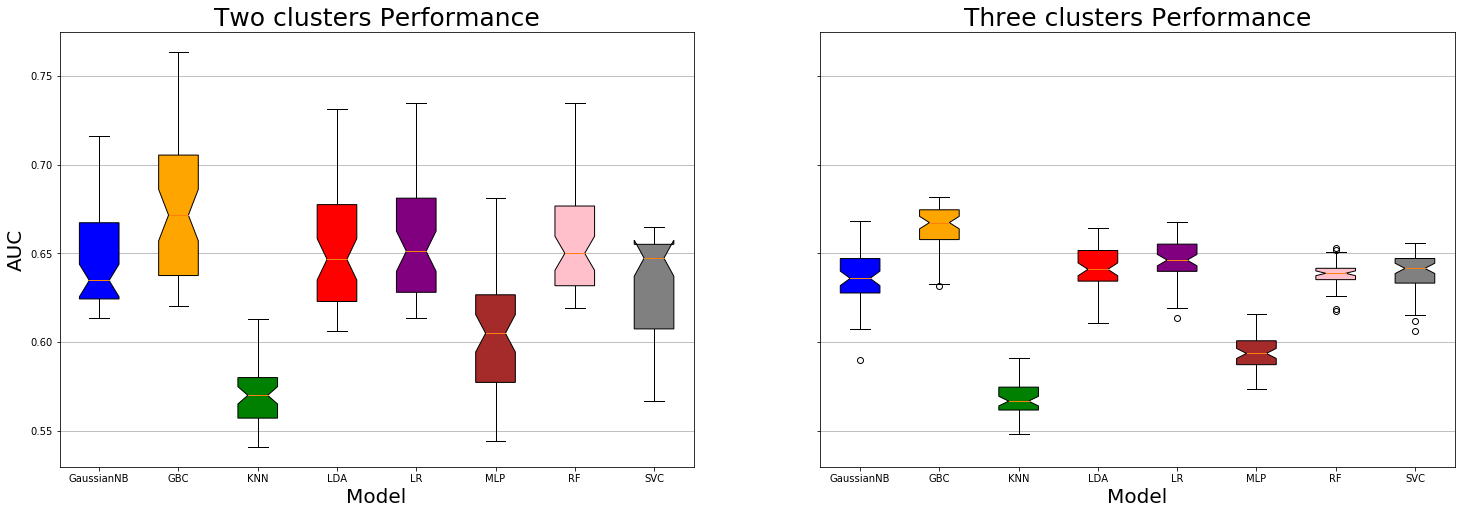

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey='all', figsize=(25,8))

box1 = axes[0].boxplot(df_cluster_2.iloc[:,2:].T,
            patch_artist=True, # to fill with color
            notch='True', # notch shape
            labels=list_names) # the labels to use
axes[0].set_title('Two clusters Performance', fontsize=25)
axes[0].set_ylabel('AUC', fontsize=20)


box2 = axes[1].boxplot(df_cluster_3.iloc[:,3:].T,
            patch_artist=True, # to fill with color
            notch='True', # notch shape
            labels=list_names) # the labels to use
axes[1].set_title('Three clusters Performance', fontsize=25)

# fill with different colors
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink','grey']
for box in (box1, box2):
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xlabel('Model', fontsize=20)

plt.show()